In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Step 1 : Reading and understanding the data

In [2]:
bike_sharing=pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Drop the features that doesn't contribute to the use case
# casual + registered is equal to the target varibale cnt, we can drop casual and registered
# instant is nothing but a serial number we can drop this feature as well.
# As month and year value is extrated from dteday, we can remove dteday
bike_sharing=bike_sharing.drop(['casual','registered','instant','dteday'],axis=1)

In [4]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [6]:
bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [7]:
bike_sharing.shape

(730, 12)

In [8]:
# To check the null value columns
bike_sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**We can encode the numerical variables into categorical variables to create dummy variables**

In [9]:
# Map the season column
bike_sharing.season=bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [10]:
# Map the mnth column
bike_sharing.mnth=bike_sharing.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [11]:
# Map the weekday column
bike_sharing.weekday=bike_sharing.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [12]:
#Map the weathersit column
bike_sharing.weathersit=bike_sharing.weathersit.map({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'})

In [13]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# rename the column for better understanding
bike_sharing=bike_sharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'})

In [15]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualizing the data

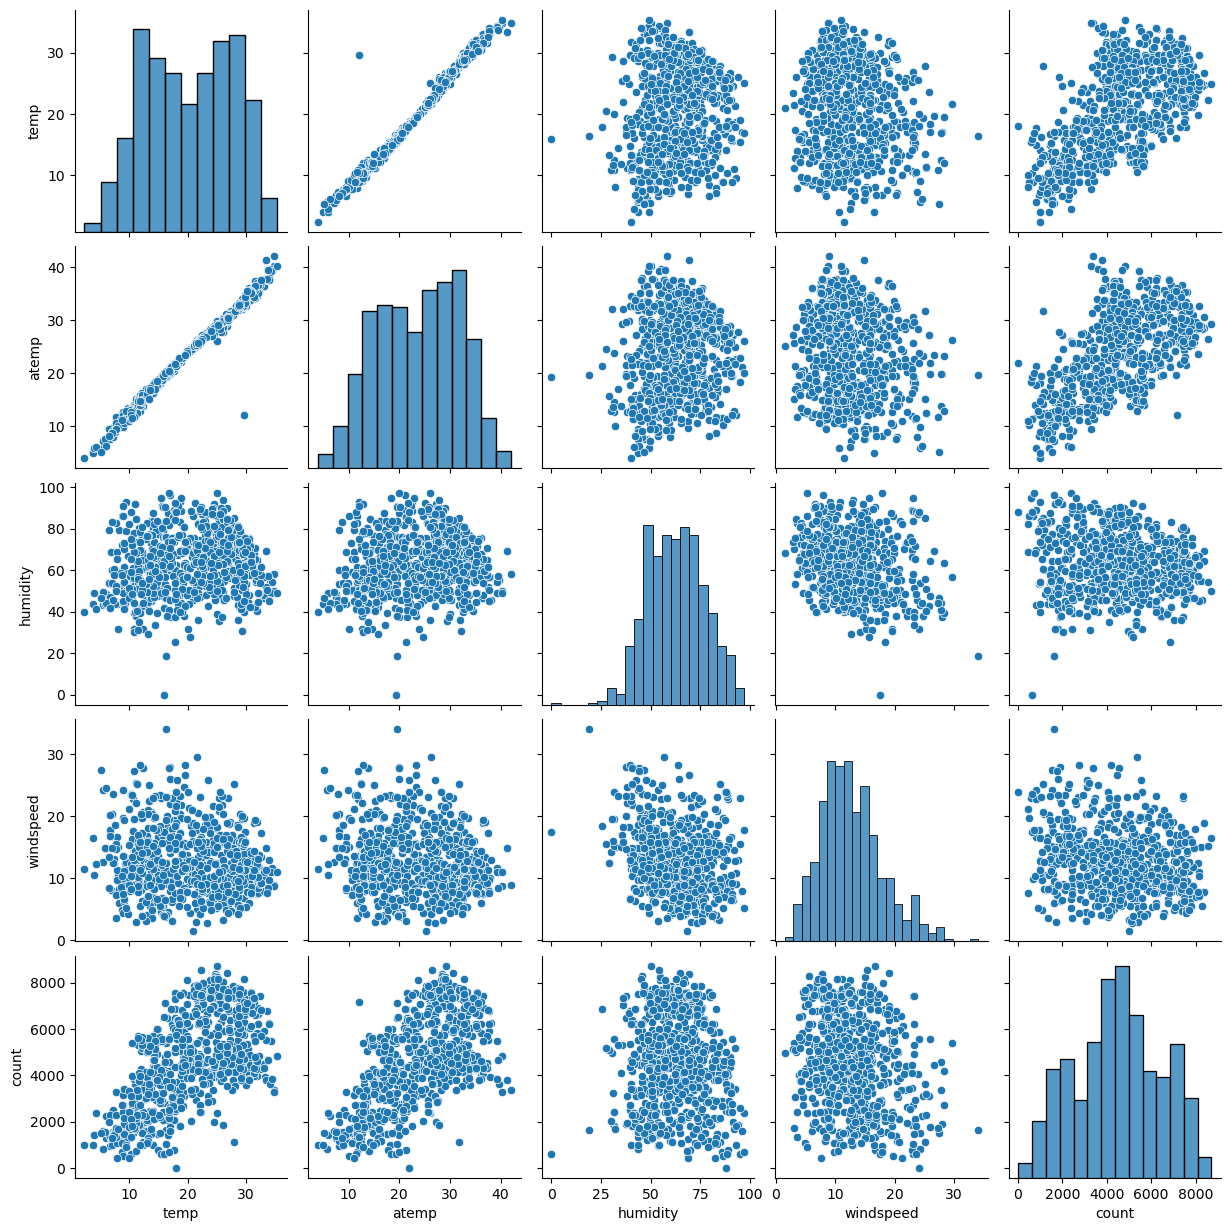

In [16]:
# visualize the numerical variables
sns.pairplot(data=bike_sharing,vars=['temp','atemp','humidity','windspeed','count'])

- The features atemp and temp are highly correlated. We can remove one of the feature based on the VIF value

__Assumption 1: The dependent and the independent variable must have a linear relationship__

    The dependent variable has linear relationship with the target variable count

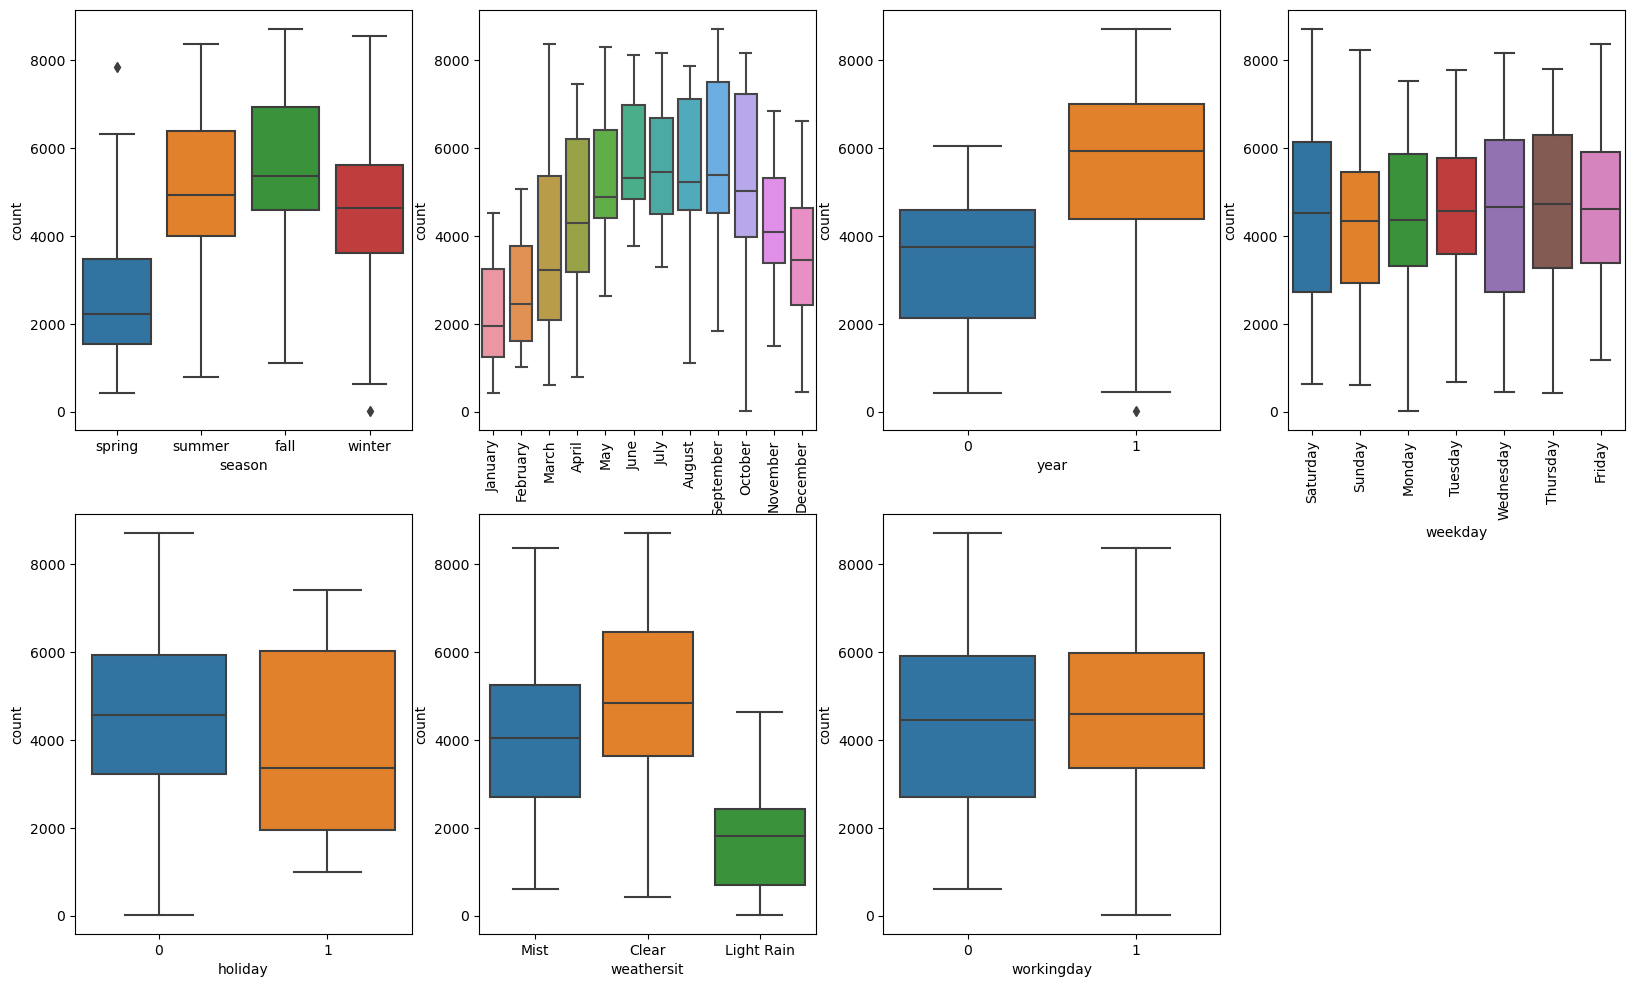

In [17]:
# visualizing the variables between numerical and categorical value
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = bike_sharing)
plt.xticks(label='month',rotation=90)
plt.subplot(2,4,3)
sns.boxplot(x = 'year', y = 'count', data = bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'count', data = bike_sharing)
plt.xticks(label='weekday',rotation=90)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'count', data = bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_sharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'count', data = bike_sharing)
plt.show()

- Number of Bike booking is more in fall season compared to winter , spring and summer season.
- Number of booking increased in 2019 compared to 2018
- Number of bookings is comparitively more when the weather is clear
- Irrespective of the holiday or workingday the number of bookings remains same.
- Saturday, wednesday and thursday contributes more bookings

<Axes: xlabel='season', ylabel='count'>

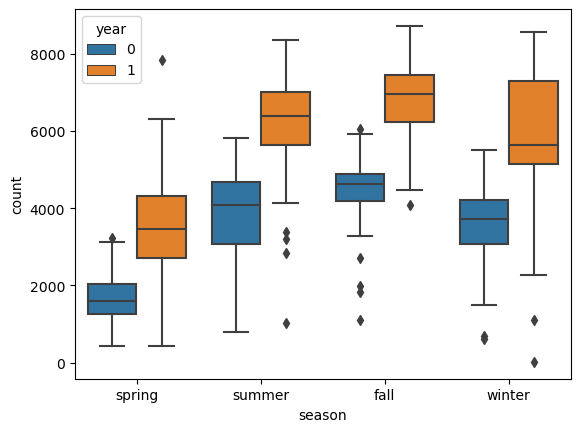

In [18]:
sns.boxplot(data=bike_sharing,x='season',y='count',hue='year')

- Fall season has more number of bookings in both 2018 and 2019
- Number of bookings during winter season does not decrease in 2019 compared to 2018

<Axes: xlabel='month', ylabel='count'>

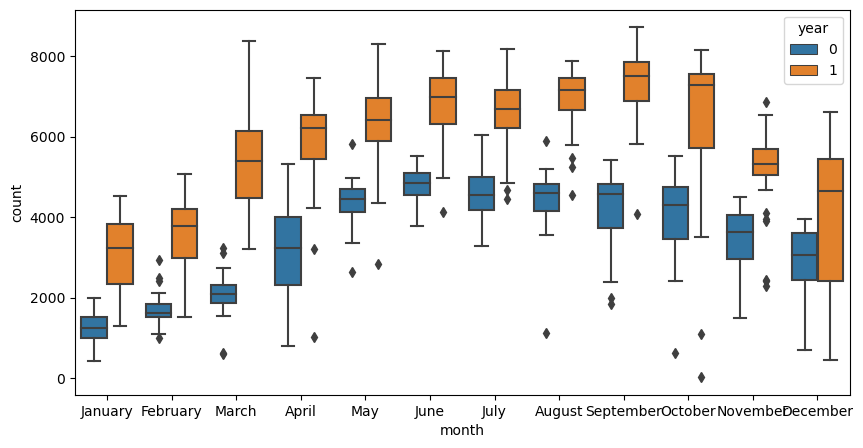

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bike_sharing,x='month',y='count',hue='year')

- Number of bike booking is comparitively more in the month of August, September and October.

# Step 2: Preparing the data for model

**Encoding Categorical variable into dummy variable**

In [20]:
month_dummy=pd.get_dummies(bike_sharing['month'],drop_first=True)
season_dummy=pd.get_dummies(bike_sharing['season'],drop_first=True)
weekday_dummy=pd.get_dummies(bike_sharing['weekday'],drop_first=True)
weathersit_dummy=pd.get_dummies(bike_sharing['weathersit'],drop_first=True)

In [21]:
bike_sharing=pd.concat([bike_sharing,month_dummy,season_dummy,weekday_dummy,weathersit_dummy],axis=1)

In [22]:
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [23]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
 12  August      730 non-null    uint8  
 13  December    730 non-null    uint8  
 14  February    730 non-null    uint8  
 15  January     730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  March       730 non-null    uint8  
 19  May         730 non-null    u

In [24]:
# As we have created the dummy variables for season,weathersit,weekday and month, we are good to drop the corresponding columns
bike_sharing=bike_sharing.drop(['month','season','weathersit','weekday'],axis=1)

In [25]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   count       730 non-null    int64  
 8   August      730 non-null    uint8  
 9   December    730 non-null    uint8  
 10  February    730 non-null    uint8  
 11  January     730 non-null    uint8  
 12  July        730 non-null    uint8  
 13  June        730 non-null    uint8  
 14  March       730 non-null    uint8  
 15  May         730 non-null    uint8  
 16  November    730 non-null    uint8  
 17  October     730 non-null    uint8  
 18  September   730 non-null    uint8  
 19  spring      730 non-null    u

#### Train test split

In [26]:
df_train,df_test=train_test_split(bike_sharing,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


#### Rescaling the features using MinMaxScaler

In [27]:
# Initiate the object 
scaler=MinMaxScaler()

In [28]:
# Fit the data using fit_transform
temp_vars=['temp','atemp','humidity','windspeed','count']
df_train[temp_vars]=scaler.fit_transform(df_train[temp_vars])

In [29]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,0,0,0,0,0,1


In [30]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3: Training the model

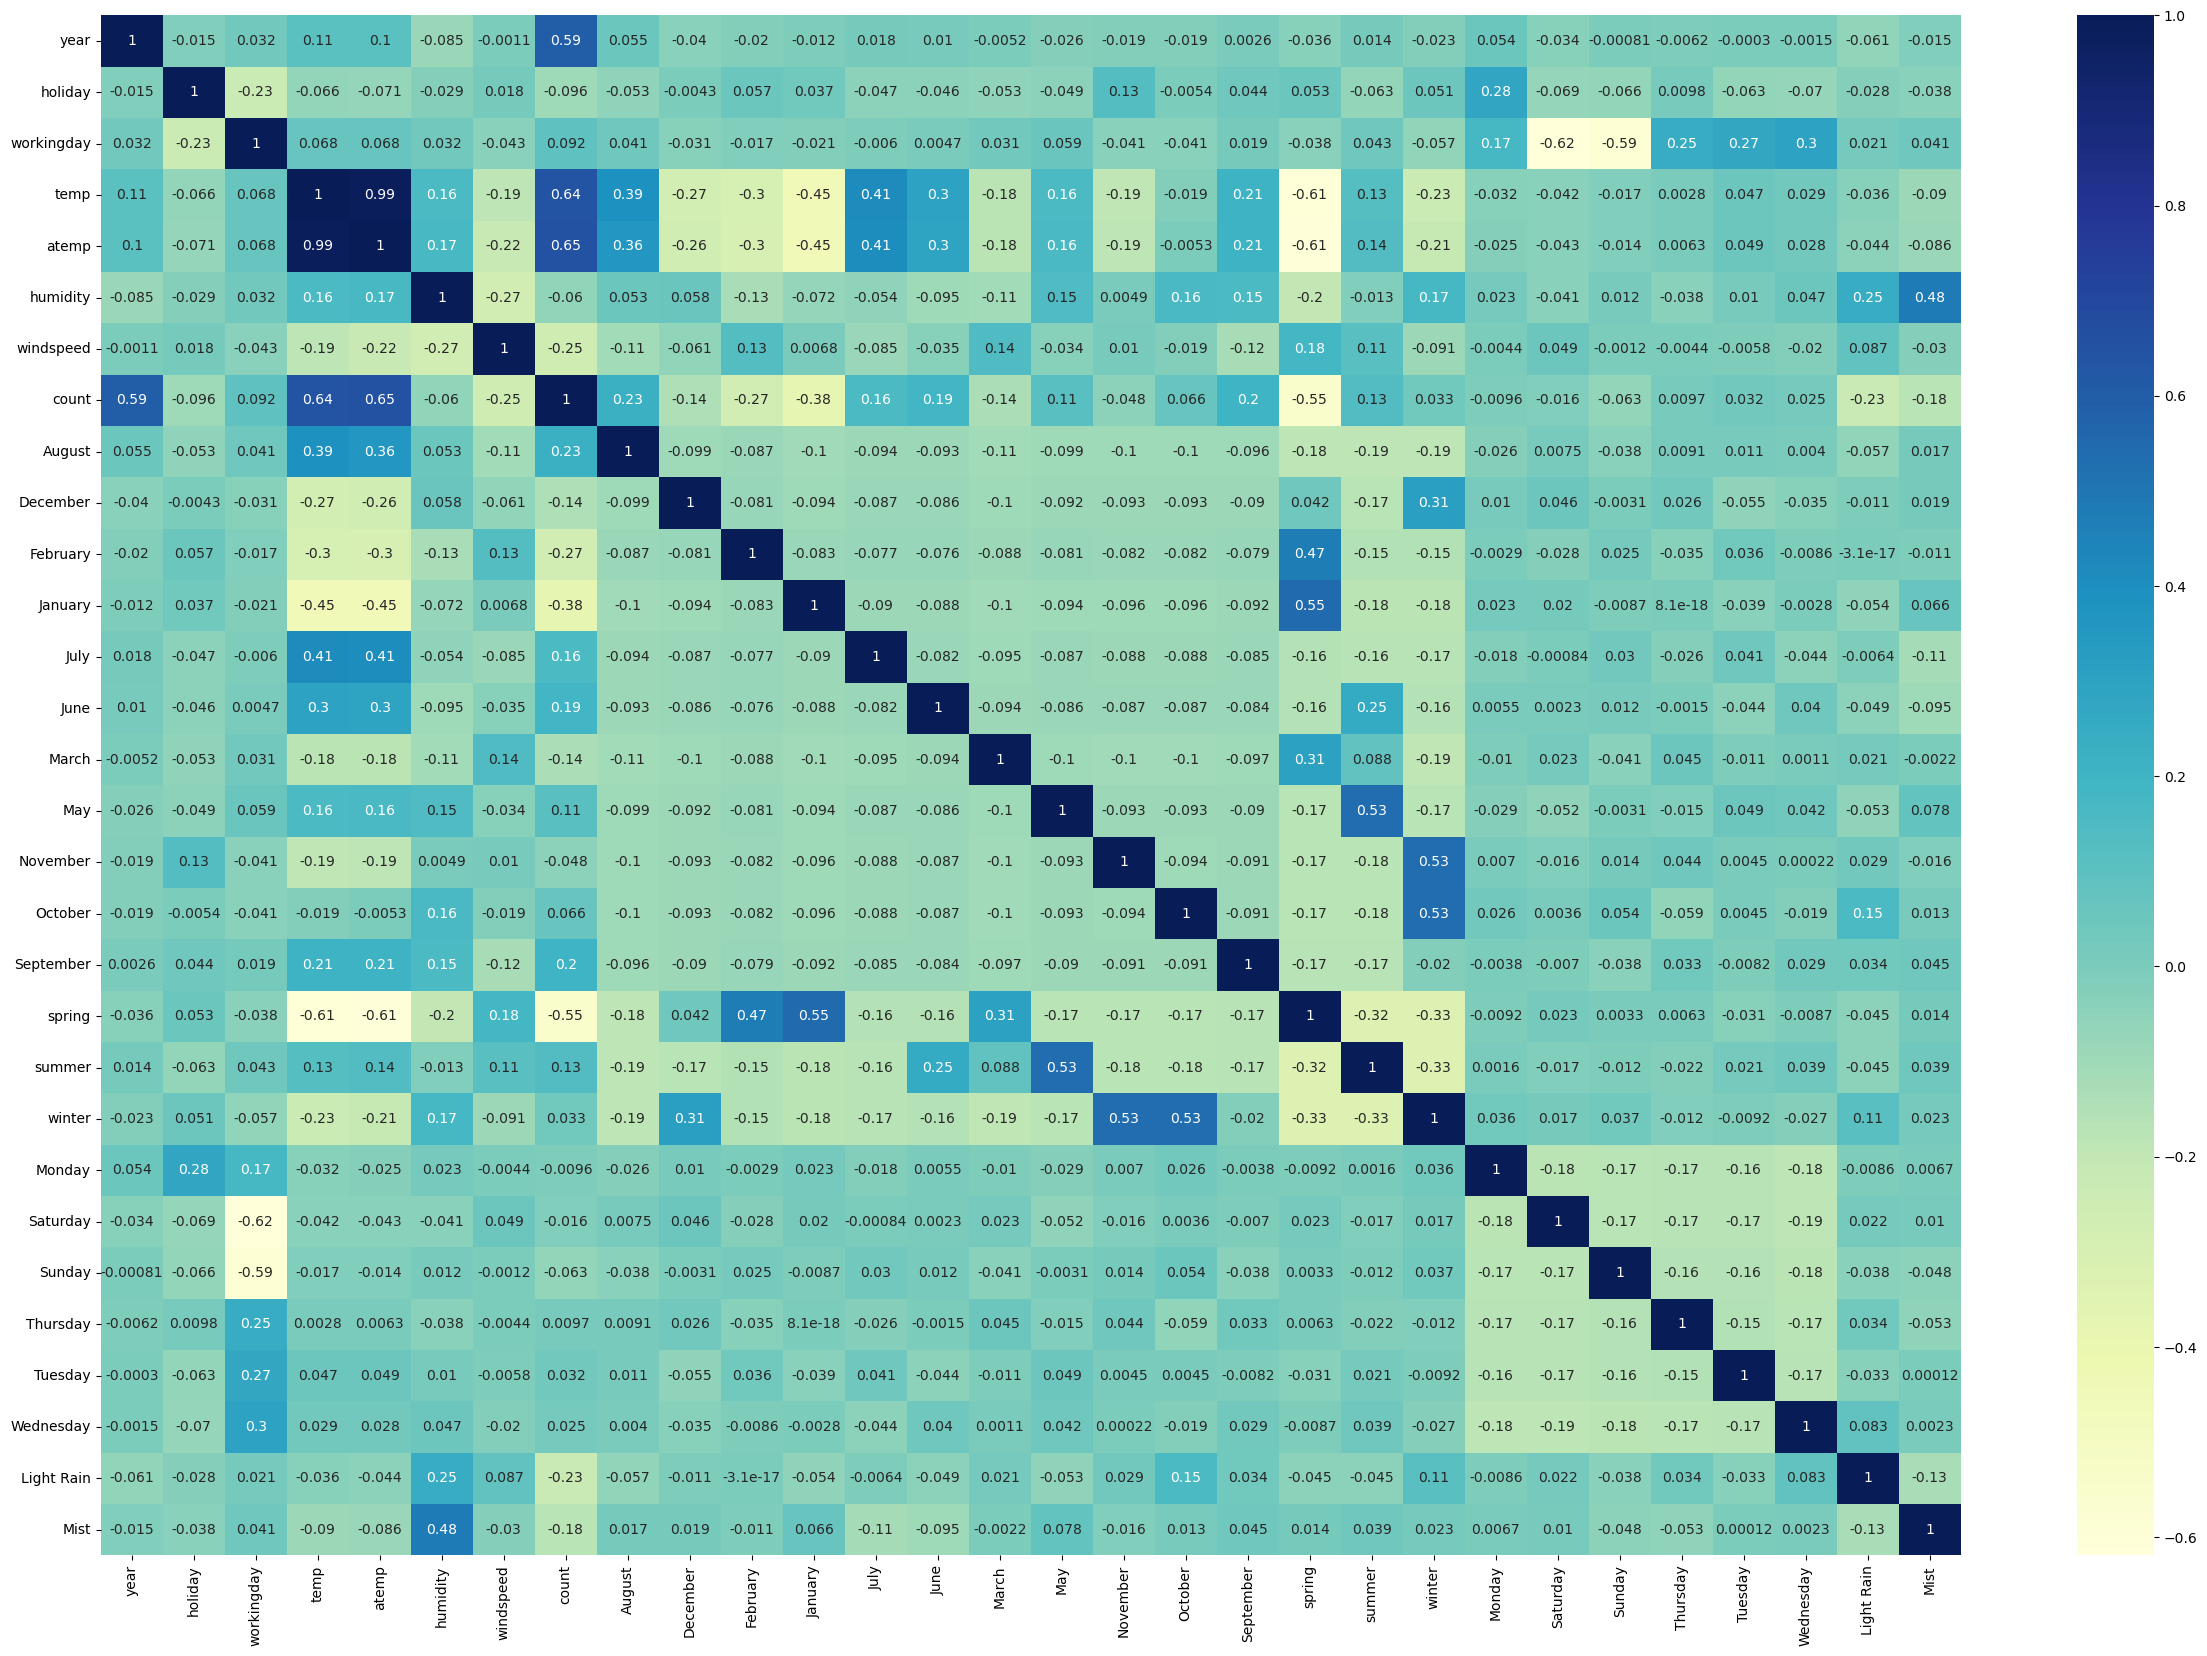

In [31]:
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [32]:
y_train=df_train.pop('count')
X_train=df_train

In [33]:
# Variable Selection Method using RFE with 15 variable
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 15),
 ('March', False, 12),
 ('May', False, 6),
 ('November', False, 2),
 ('October', False, 10),
 ('September', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 14),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11),
 ('Light Rain', True, 1),
 ('Mist', True, 1)]

In [35]:
vars=X_train.columns[rfe.support_]
vars

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'January', 'July', 'September', 'spring', 'summer', 'winter',
       'Saturday', 'Light Rain', 'Mist'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['atemp', 'August', 'December', 'February', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [37]:
X_train_rfe=X_train[vars]
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,January,July,September,spring,summer,winter,Saturday,Light Rain,Mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,1,0,1


**Model 1**

In [38]:
###  Building model using statsmodel
X_train_sm=sm.add_constant(X_train_rfe)
lr_1=sm.OLS(y_train,X_train_sm)
lr_model_1=lr_1.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.31e-191
Time:                        22:48:26   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.000       0.180       0.322
year           0.2305      0.008     28.807      0.000       0.215       0.246
holiday       -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday     0.0435      0.012      3.781      0.000       0.021       0.066
temp           0.5098      0.034     14.851      0.000       0.442       0.577
humidity      -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed     -0.1860      0.025     -7.301      0.000      -0.236      -0.136
January       -0.0343      0.017     -1.980      0.048      -0.068      -0.000
July          -0.0532      0.018     -2.947      0.003      -0.089      -0.018
September      0.0812      0.016      4.934      0.000       0.049       0.114
spring        -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer         0.0497      0.015      3.346      0.001       0.020       0.079
winter         0.0944      0.017      5.479      0.000       0.061       0.128
Saturday       0.0537      0.014      3.707      0.000       0.025       0.082
Light Rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Mist          -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
def calculate_vif(X_train_rfe):
    vif=pd.DataFrame()
    vif['Features']=X_train_rfe.columns
    vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [40]:
print(calculate_vif(X_train_rfe))

      Features    VIF
4     humidity  29.40
3         temp  17.77
2   workingday   5.31
5    windspeed   4.73
9       spring   4.53
11      winter   3.48
10      summer   2.84
14        Mist   2.29
0         year   2.09
12    Saturday   1.98
6      January   1.67
7         July   1.59
8    September   1.39
13  Light Rain   1.25
1      holiday   1.18


As humidity holds more VIF value, we are proceeding to remove the humidity variable.

**Model 2**

In [41]:
X_train_new=X_train_rfe.drop(['humidity'],axis=1)

In [42]:
X_train_sm=sm.add_constant(X_train_new)
lr_2=sm.OLS(y_train,X_train_sm)
lr_model_2=lr_2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          7.33e-189
Time:                        22:48:26   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.000       0.112       0.235
year           0.2344      0.008     29.019      0.000       0.218       0.250
holiday       -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday     0.0465      0.012      3.983      0.000       0.024       0.069
temp           0.4728      0.034     14.037      0.000       0.407       0.539
windspeed     -0.1563      0.025     -6.292      0.000      -0.205      -0.107
January       -0.0389      0.018     -2.215      0.027      -0.073      -0.004
July          -0.0482      0.018     -2.635      0.009      -0.084      -0.012
September      0.0753      0.017      4.522      0.000       0.043       0.108
spring        -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer         0.0434      0.015      2.890      0.004       0.014       0.073
winter         0.0797      0.017      4.650      0.000       0.046       0.113
Saturday       0.0584      0.015      3.980      0.000       0.030       0.087
Light Rain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
Mist          -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print(calculate_vif(X_train_new))

      Features   VIF
3         temp  7.07
2   workingday  5.24
4    windspeed  4.67
8       spring  3.08
9       summer  2.33
0         year  2.08
10      winter  1.99
11    Saturday  1.97
5      January  1.62
6         July  1.59
13        Mist  1.57
7    September  1.35
1      holiday  1.17
12  Light Rain  1.09


Even though temp has the high value, we are removing the working day column first. Because, temp plays a significant role in the bike rental.

**Model 3**

In [44]:
X_train_new=X_train_rfe.drop(['humidity','workingday'],axis=1)

In [45]:
X_train_sm=sm.add_constant(X_train_new)
lr_3=sm.OLS(y_train,X_train_sm)
lr_model_3=lr_3.fit()
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.21e-186
Time:                        22:48:27   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.030      6.986      0.000       0.152       0.272
year           0.2346      0.008     28.628      0.000       0.219       0.251
holiday       -0.0939      0.026     -3.614      0.000      -0.145      -0.043
temp           0.4741      0.034     13.868      0.000       0.407       0.541
windspeed     -0.1570      0.025     -6.231      0.000      -0.207      -0.108
January       -0.0383      0.018     -2.146      0.032      -0.073      -0.003
July          -0.0512      0.019     -2.758      0.006      -0.088      -0.015
September      0.0760      0.017      4.498      0.000       0.043       0.109
spring        -0.0613      0.021     -2.895      0.004      -0.103      -0.020
summer         0.0425      0.015      2.791      0.005       0.013       0.072
winter         0.0769      0.017      4.425      0.000       0.043       0.111
Saturday       0.0201      0.011      1.788      0.074      -0.002       0.042
Light Rain    -0.2869      0.025    -11.668      0.000      -0.335      -0.239
Mist          -0.0808      0.009     -9.256      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
print(calculate_vif(X_train_new))

      Features   VIF
2         temp  5.16
3    windspeed  4.64
7       spring  2.76
8       summer  2.23
0         year  2.07
9       winter  1.80
4      January  1.61
5         July  1.59
12        Mist  1.56
6    September  1.34
10    Saturday  1.19
11  Light Rain  1.08
1      holiday  1.05


As Saturday seems insignificant(high p value) for this model, we can drop this column

**Model 4**

In [47]:
X_train_new=X_train_rfe.drop(['humidity','workingday','Saturday'],axis=1)

In [48]:
X_train_sm=sm.add_constant(X_train_new)
lr_4=sm.OLS(y_train,X_train_sm)
lr_model_4=lr_4.fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.97e-187
Time:                        22:48:27   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.000       0.156       0.275
year           0.2342      0.008     28.524      0.000       0.218       0.250
holiday       -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp           0.4728      0.034     13.803      0.000       0.405       0.540
windspeed     -0.1549      0.025     -6.140      0.000      -0.205      -0.105
January       -0.0380      0.018     -2.125      0.034      -0.073      -0.003
July          -0.0507      0.019     -2.728      0.007      -0.087      -0.014
September      0.0762      0.017      4.500      0.000       0.043       0.110
spring        -0.0615      0.021     -2.898      0.004      -0.103      -0.020
summer         0.0422      0.015      2.766      0.006       0.012       0.072
winter         0.0771      0.017      4.424      0.000       0.043       0.111
Light Rain    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
Mist          -0.0807      0.009     -9.222      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print(calculate_vif(X_train_new))

      Features   VIF
2         temp  5.13
3    windspeed  4.61
7       spring  2.75
8       summer  2.22
0         year  2.07
9       winter  1.79
4      January  1.61
5         July  1.59
11        Mist  1.56
6    September  1.34
10  Light Rain  1.08
1      holiday  1.04


Comparitively, January has more p value than all other variable. so proceeding too remove.

**Model 5**

In [50]:
X_train_new=X_train_rfe.drop(['humidity','workingday','Saturday','January'],axis=1)

In [51]:
X_train_sm=sm.add_constant(X_train_new)
lr_5=sm.OLS(y_train,X_train_sm)
lr_model_5=lr_5.fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.40e-187
Time:                        22:48:27   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.000       0.142       0.258
year           0.2335      0.008     28.361      0.000       0.217       0.250
holiday       -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp           0.4915      0.033     14.798      0.000       0.426       0.557
windspeed     -0.1480      0.025     -5.893      0.000      -0.197      -0.099
July          -0.0524      0.019     -2.811      0.005      -0.089      -0.016
September      0.0767      0.017      4.511      0.000       0.043       0.110
spring        -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer         0.0453      0.015      2.971      0.003       0.015       0.075
winter         0.0831      0.017      4.818      0.000       0.049       0.117
Light Rain    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist          -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
print(calculate_vif(X_train_new))

      Features   VIF
2         temp  5.09
3    windspeed  4.60
7       summer  2.21
6       spring  2.08
0         year  2.07
8       winter  1.79
4         July  1.58
10        Mist  1.55
5    September  1.34
9   Light Rain  1.08
1      holiday  1.04


We can observe that the VIF value of temp decreased in each model. Hence, we can remove the next high p value variable July

**Model 6**

In [53]:
X_train_new=X_train_rfe.drop(['humidity','workingday','Saturday','January','July'],axis=1)

In [54]:
X_train_sm=sm.add_constant(X_train_new)
lr_6=sm.OLS(y_train,X_train_sm)
lr_model_6=lr_6.fit()
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          7.36e-187
Time:                        22:48:27   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.000       0.133       0.249
year           0.2341      0.008     28.246      0.000       0.218       0.250
holiday       -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp           0.4782      0.033     14.446      0.000       0.413       0.543
windspeed     -0.1482      0.025     -5.860      0.000      -0.198      -0.098
September      0.0909      0.016      5.565      0.000       0.059       0.123
spring        -0.0551      0.021     -2.641      0.009      -0.096      -0.014
summer         0.0610      0.014      4.271      0.000       0.033       0.089
winter         0.0959      0.017      5.730      0.000       0.063       0.129
Light Rain    -0.2860      0.025    -11.492      0.000      -0.335      -0.237
Mist          -0.0801      0.009     -9.090      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lr_model_6.params

const         0.190994
year          0.234060
holiday      -0.096865
temp          0.478177
windspeed    -0.148155
September     0.090932
spring       -0.055092
summer        0.060987
winter        0.095929
Light Rain   -0.286002
Mist         -0.080124
dtype: float64

__Assumption 2: No autocorrelation in residuals__

    Durbin-Watson value for the model is ~2 which seems positive autocorrelation(i.e no correlation)

In [56]:
print(calculate_vif(X_train_new))

     Features   VIF
3   windspeed  4.59
2        temp  3.84
0        year  2.07
5      spring  1.99
6      summer  1.89
7      winter  1.63
9        Mist  1.54
4   September  1.23
8  Light Rain  1.08
1     holiday  1.04


__Assumption 3: No perfect multicollinearity__
    
    As the VIF values are less than 5 in our case, there is no perfect multicollinearity

- All the variable based on p value looks significant and VIF values also look fit for the model.
- R2 value also have ~83%.(ie) 83% variance in data is explained by the fitted line
- Probability of F statistic also extremely close to zero and F Statistic is 249.2(>1) shows the significance of the overall model fit

# Step 4: Residual Analysis

In [57]:
y_train_pred=lr_model_6.predict(X_train_sm)

<Axes: ylabel='Density'>

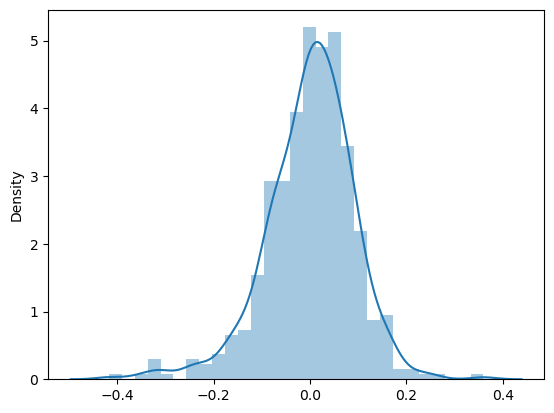

In [58]:
res=y_train-y_train_pred
sns.distplot(res)

__Assumption 4 : Error terms should normally distributed with mean zero__

    Error terms are normally distributed with mean value 0.

# Step 5: Predictions and evaluation on the test set

**Preprocessing steps(scaling) which we have done in trained data should be replicated in test set data also.**

In [59]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,1,0,0,0,0,1,0,0,0,0


In [60]:
### Sacling the test data set
# Fit the data using transform 
temp_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_test[temp_vars]=scaler.transform(df_test[temp_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,1,0,0,0,0


In [61]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.264840,0.232877,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.442259,0.423633,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test=df_test.pop('count')
X_test=df_test

In [63]:
train_cols=X_train_new.columns
X_test=X_test[train_cols]

In [64]:
# Adding constant variable to test dataset
X_test_sm=sm.add_constant(X_test)

In [65]:
# predicting the model for test dataset
y_test_pred=lr_model_6.predict(X_test_sm)

In [66]:
r2_value=r2_score(y_test,y_test_pred)
r2_value

0.8035441330582012

In [67]:
adjusted_r2 = round(1-(1-r2_value)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7941


<Axes: xlabel='count'>

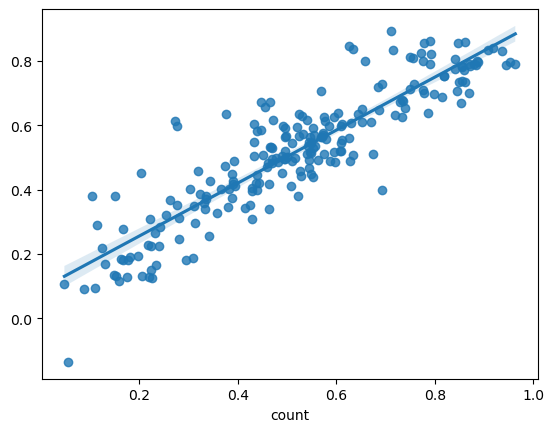

In [68]:
# visualizing the test data fit
plt.figure()
sns.regplot(x=y_test, y=y_test_pred)

<Axes: ylabel='Density'>

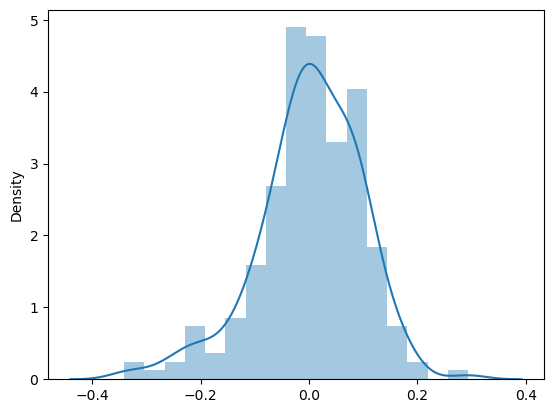

In [69]:
# calculating the residual
res=y_test-y_test_pred
sns.distplot(res)

Test data error terms are also normally distributed with mean 0.

**Final Result**
- R2_score for Trained data : 0.833
- Adjusted R2 for Trained data : 0.830
- R2_score for Test data : 0.804
- Adjusted R2 for Test data : 0.794

**The delta of Trained and test data r2 score is 5%. It seems a good model** 

The equation of best fitted line is:

_count=0.191+0.478*temp-0.286*Light Rain+0.234*year-0.148*windspeed-0.097*holiday+0.096*winter+0.091*september-0.08*mist+0.061*summer-0.551*spring_